In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np
import sklearn

%matplotlib inline

In [2]:
signal, sr = librosa.load("classical.00045.wav")

In [3]:
print("Signal Shape:",signal.shape)
print("Freq:",sr)

Signal Shape: (665280,)
Freq: 22050


In [4]:
ipd.Audio("classical.00045.wav")

Text(0, 0.5, 'Amplitude')

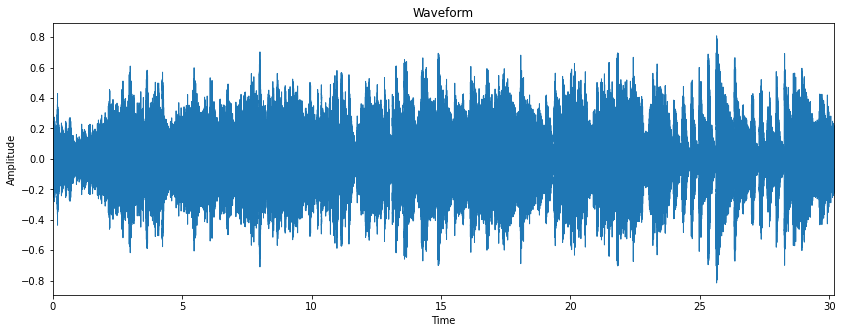

In [5]:
# Plotting Waveform
plt.figure(figsize=(14, 5))
librosa.display.waveplot(signal, sr=sr)
plt.title("Waveform")
plt.xlabel("Time")
plt.ylabel("Amplitude")

Text(0, 0.5, 'Magnitude')

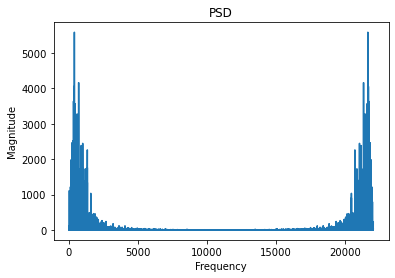

In [6]:
# Plotting Power Spectral Density
fft = np.fft.fft(signal)

magnitude = np.abs(fft)
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.title("PSD")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

Text(0, 0.5, 'Magnitude')

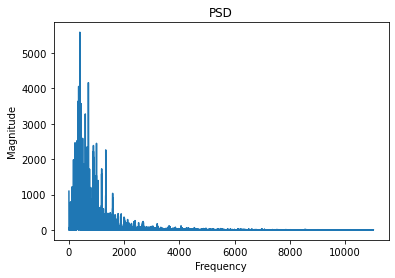

In [7]:
left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(magnitude)/2)]

plt.plot(left_frequency, left_magnitude)
plt.title("PSD")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")

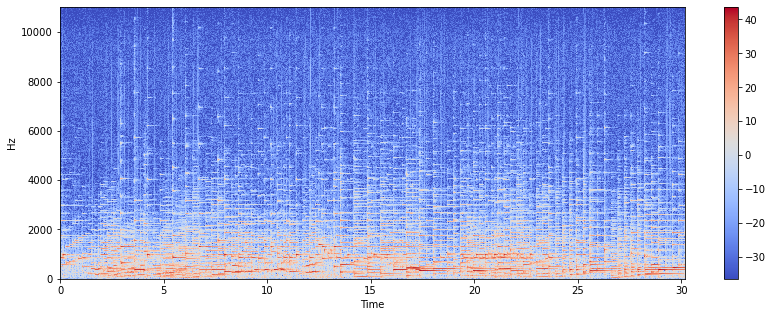

In [8]:
# Plotting Spectrogram
stft = librosa.stft(signal)
stft_db = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(14, 5))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Feature Extraction

In [9]:
# Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(signal, sr=sr)[0]
spectral_centroids.shape

(1300,)

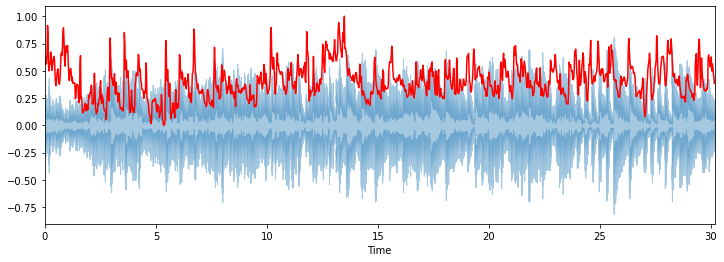

In [10]:
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

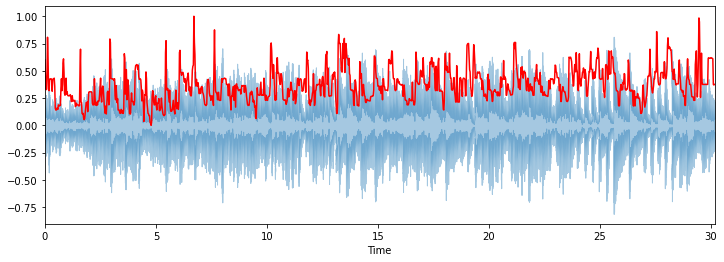

In [11]:
# Spectral Rolloff
spectral_rolloff = librosa.feature.spectral_rolloff(signal+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

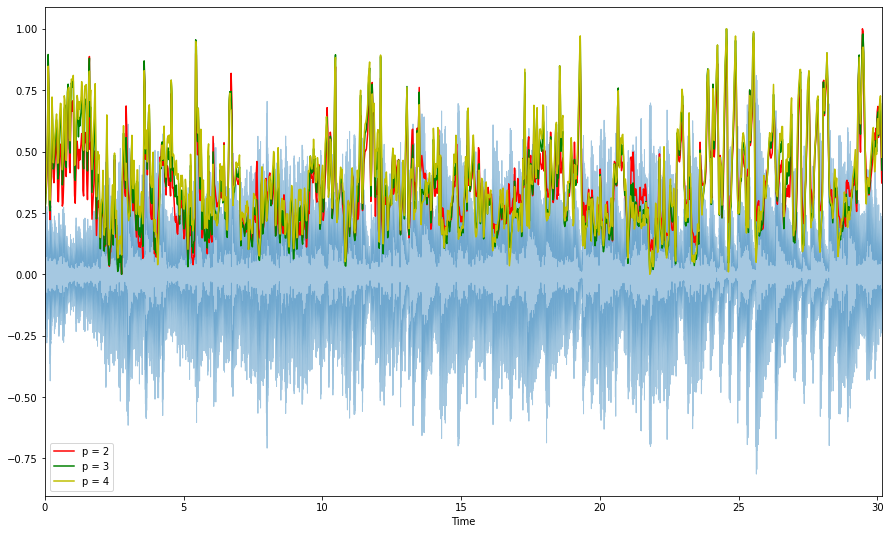

In [12]:
# Spectral BandWidth
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(signal+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(signal+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(signal+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(signal, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

In [13]:
# Mel-Frequency Cepstral Coefficients(MFCCs)
mfccs = librosa.feature.mfcc(signal, sr=sr)
mfccs.T.shape

(1300, 20)

In [14]:
import pandas as pd
pd.DataFrame(mfccs.T).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-172.887604,151.992279,-38.104103,-5.773766,-21.075180,-9.885938,-18.441656,5.018622,7.060198,0.639880,-3.070124,-8.725704,-0.794988,20.911779,10.651574,-6.970836,-1.706603,6.761671,-9.005614,-19.503601
1,-185.082977,154.301117,-31.322655,-4.117069,-16.930153,-10.940538,-15.114577,3.508687,5.841122,1.177858,-9.064039,-10.712214,-2.543003,24.241671,13.284406,-5.450054,-3.555764,7.468900,-9.706343,-24.018463
2,-211.181900,147.591217,-22.178898,-3.809612,-12.177146,-12.515940,-9.118301,8.193995,4.327636,-0.210518,-14.428478,-13.000128,-2.921929,30.066296,21.050106,-5.143238,-6.775708,8.234472,-12.859739,-30.192911
3,-224.639954,141.414536,-17.584988,-3.117430,-10.751378,-13.143790,-8.639752,9.399431,7.679780,-0.923980,-14.728537,-14.021845,-0.620815,30.793947,22.401863,-3.467300,-6.421148,5.083927,-13.952703,-27.335545
4,-229.956528,136.498093,-15.965990,-3.427242,-13.383162,-13.283638,-11.524988,12.069084,7.857385,-2.366015,-13.502978,-11.824319,5.059022,28.029415,18.099201,-1.121987,-7.185711,2.467893,-12.197763,-23.550838
5,-219.514999,114.852829,-12.453987,-4.696838,-13.571852,-10.360813,-9.865564,15.343393,6.167858,0.756725,-9.995043,-3.344208,9.084204,22.345495,14.520802,1.839237,-3.725730,-0.431442,-15.193751,-27.430019
6,-194.278275,121.073891,-22.608665,-18.700493,-25.755899,-9.948982,-0.157581,22.089066,6.272364,-6.361675,-19.375340,-0.895959,11.211635,20.750708,15.924987,3.852923,-5.662696,-7.749750,-24.060013,-23.665373
7,-186.594482,147.716339,-31.639250,-17.873335,-23.440063,-4.202661,7.044638,22.461523,9.201756,-9.030941,-26.335745,-3.578771,7.473240,18.449360,9.817707,3.108177,-10.395420,-14.859357,-28.964672,-17.176991
8,-204.405945,149.999268,-27.370382,-15.846884,-17.794392,-6.373834,6.547058,21.866560,12.320986,-10.496145,-28.368923,-8.288095,8.009371,22.925835,11.602236,-0.964591,-12.791265,-13.738826,-29.786777,-18.699083
9,-233.471039,138.650146,-21.233501,-11.052233,-11.104200,-9.378564,1.282451,25.232098,18.424152,-13.386992,-32.101379,-9.544692,16.189133,31.615780,17.429317,-0.925495,-13.031324,-9.255718,-25.531319,-21.025265


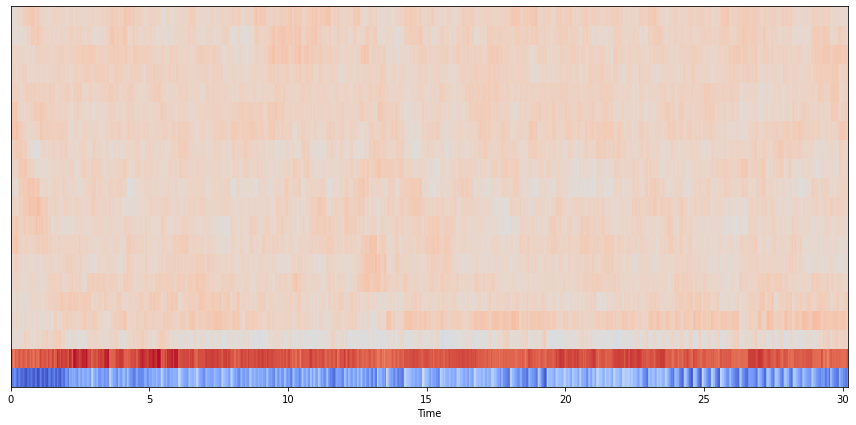

In [15]:
plt.figure(figsize=(15, 7))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

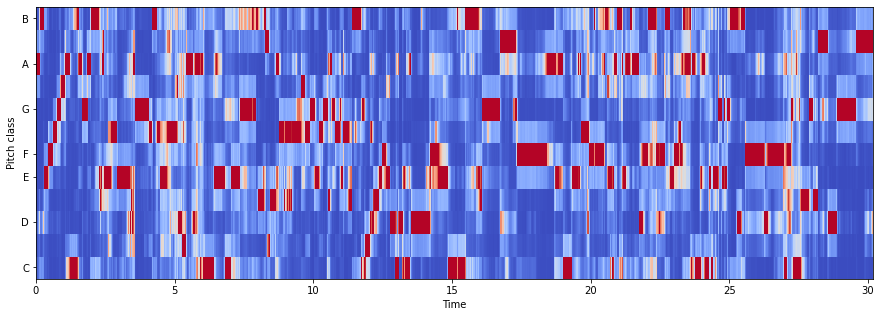

In [16]:
# Chroma vector
hop_length = 512
chromagram = librosa.feature.chroma_stft(signal, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')